# Time Series Prediction using simple RNN and LSTM

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Improrting libraries
from datetime import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import yfinance as yf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, SimpleRNN
from keras.models import Sequential
from keras.layers import Dense

In [3]:
keras.backend.set_image_data_format("channels_last")
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight") 
%matplotlib inline

In [ ]:
import prototyping.TS_LSTM as tspy

## Data Preprocessing and Visualization

In [6]:
# Retrieve historical stock price data for AAPL from Yahoo Finance
dataset = yf.download('AAPL', start='2012-01-01', end=datetime.now())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [7]:
dataset.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.375392,12.413611,12.308284,12.320321,302220800
2012-01-04,12.441902,12.479219,12.316713,12.338380,260022000
2012-01-05,12.580028,12.595676,12.418725,12.487340,271269600
2012-01-06,12.711535,12.722067,12.615837,12.632389,318292800
2012-01-09,12.691372,12.872535,12.679936,12.804825,394024400


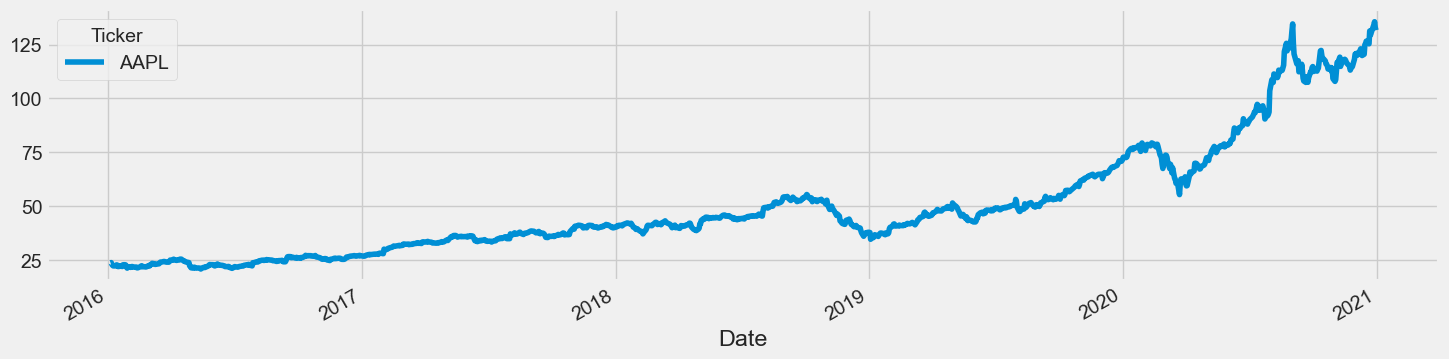

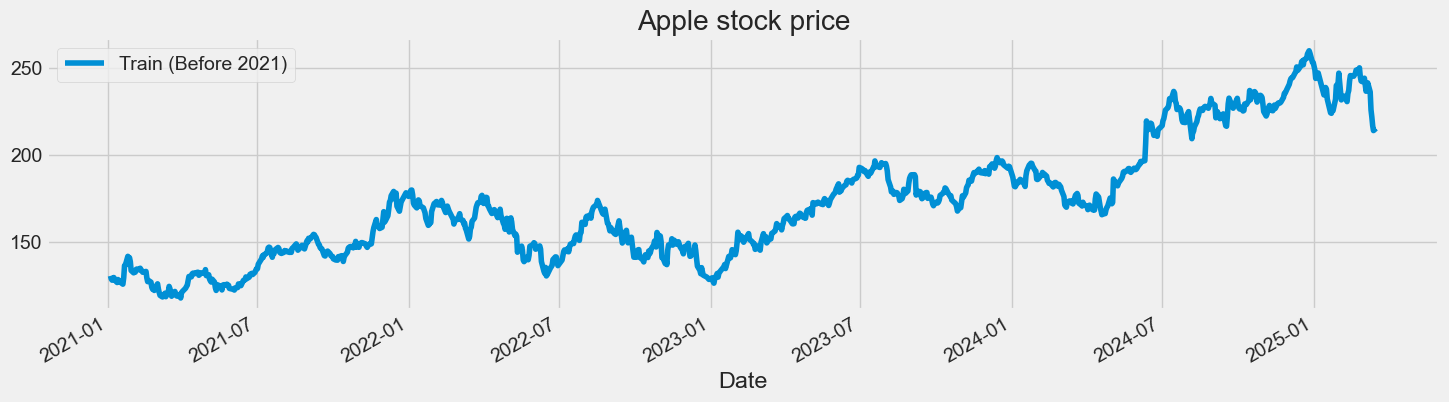

In [11]:
tstart = 2016  # Start year
tend = 2020    # End year

tspy.train_test_plot(dataset, tstart, tend)

In [13]:
training_set, test_set = tspy.train_test_split(dataset, tstart, tend)

In [14]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

In [19]:
n_steps = 1      # Number of time steps in each sequence
features = 1     # Number of features in each time step

X_train, y_train = tspy.split_sequence(training_set_scaled, n_steps)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)

## Time Series Prediction using RNN

In [20]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=125, input_shape=(n_steps, features)))
model_rnn.add(Dense(units=1))
model_rnn.compile(optimizer="RMSprop", loss="mse")

history = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)


In [21]:
inputs = sc.transform(test_set.reshape(-1, 1))

X_test, y_test = tspy.split_sequence(inputs, n_steps)
X_test = X_test.reshape(-1, n_steps, features)

predicted_stock_price = model_rnn.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


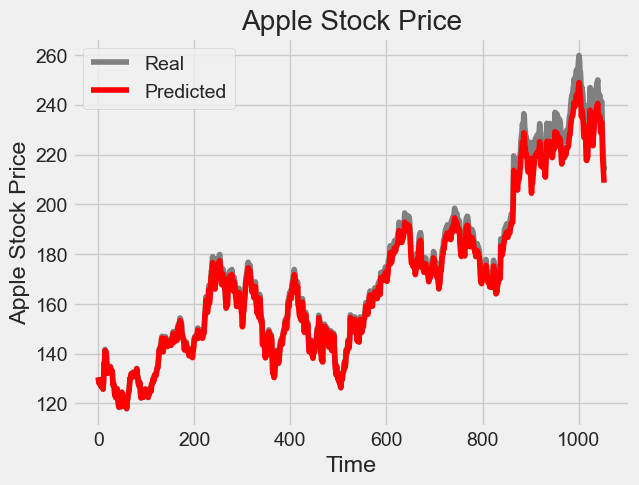

In [22]:
tspy.plot_predictions(test_set, predicted_stock_price, "Apple Stock Price")


## Time Series Prediction using LSTM

In [25]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer="RMSprop", loss="mse")

history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

predicted_stock_price = model_lstm.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


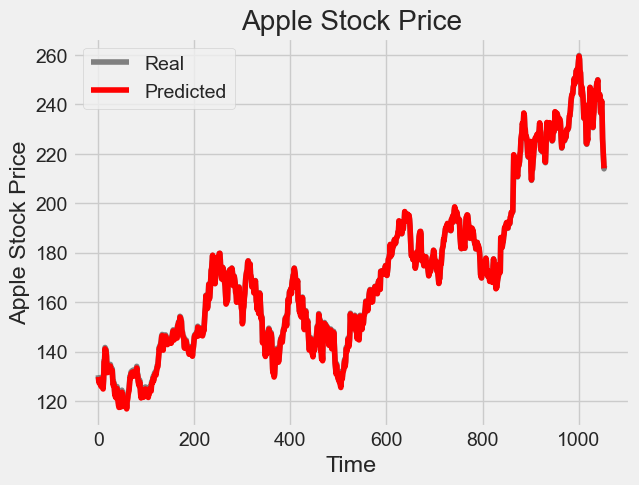

In [27]:
tspy.plot_predictions(test_set, predicted_stock_price, "Apple Stock Price")